######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#35c337">Support Vector Machine (SVM)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#a9c335">Importing libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#a9c335">Load train and test data

In [2]:
train = pd.read_csv("~/Desktop/Analysis/Work/ML_EIT/Data/MNIST_train.csv")
test = pd.read_csv("~/Desktop/Analysis/Work/ML_EIT/Data/MNIST_test.csv")

In [3]:
test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.shape,test.shape)

(60000, 787) (10000, 787)


In [5]:
print(train.labels,test['labels'])

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: labels, Length: 60000, dtype: int64 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: labels, Length: 10000, dtype: int64


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB


In [7]:
test_cnt = Counter(test.labels)
train_cnt = Counter(train['labels'])
print(test_cnt)
print(train_cnt)

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


Text(0.5, 1.0, 'Test dataset')

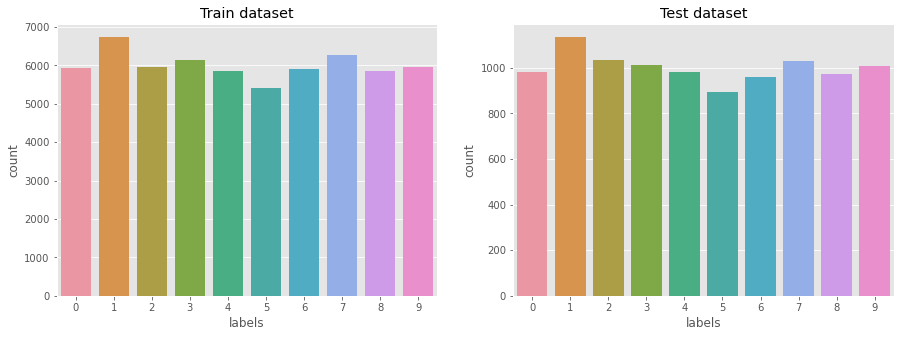

In [8]:
f, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.countplot(train.labels,ax=axes[0])
axes[0].set_title('Train dataset')

sns.countplot(test.labels,ax=axes[1])
axes[1].set_title('Test dataset')

In [9]:
lbls = train['labels'].unique()
cnts = train['labels'].value_counts()
lbls,cnts

(array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8]),
 1    6742
 7    6265
 3    6131
 2    5958
 9    5949
 0    5923
 6    5918
 8    5851
 4    5842
 5    5421
 Name: labels, dtype: int64)

In [10]:
lbls

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

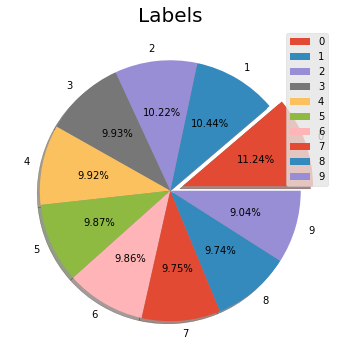

In [11]:
labls = ['0', '1','2','3','4','5','6','7','8','9']
size = train['labels'].value_counts()
explode = [0.1,0,0,0,0,0,0,0,0,0]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, explode = explode, labels = labls, shadow = True, autopct = '%.2f%%')
plt.title('Labels', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

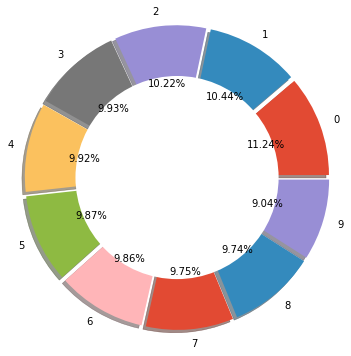

In [20]:
labls = ['0', '1','2','3','4','5','6','7','8','9']
size = train['labels'].value_counts()
explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, explode = explode, labels = labls, shadow = True, autopct = '%.2f%%')
#        startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

#equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()